# Loan Prediction

# Problem
A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a data set.

# Feature Information

 
Loan_ID	Unique Loan ID

Gender	Male/ Female

Married	Applicant married (Y/N)

Dependents	Number of dependents

Education	Applicant Education (Graduate/ Under Graduate)

Self_Employed	Self employed (Y/N)

ApplicantIncome	Applicant income

CoapplicantIncome	Coapplicant income

LoanAmount	Loan amount in thousands

Loan_Amount_Term	Term of loan in months

Credit_History	credit history meets guidelines

Property_Area	Urban/ Semi Urban/ Rural

Loan_Status	Loan approved (Y/N)


# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
data=pd.read_csv("loan_prediction.csv")

# Familiarisation with the data

In [3]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Null Value Analysis

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some features in the dataset that needs to be treated for modelling

# HeatMap for null value

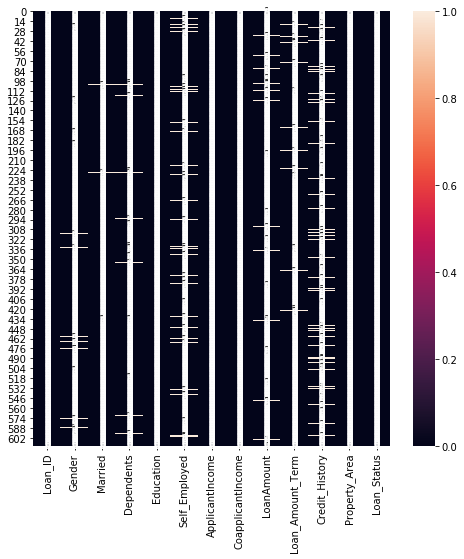

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull(),annot=True)

# Treating Null/Missing values

In [8]:
#Replace Nan values
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode().values[0],inplace=True)
data['Gender'].fillna(data['Gender'].mode().values[0],inplace=True)
data['Married'].fillna(data['Married'].mode().values[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode().values[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode().values[0],inplace=True)
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

The features which has null values have been replaced either by either mean or mode of the column ,in additionto that 'Dependents' column was also having 3+ as values which is mapped to 3 now for the ease of training the algorithm


In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


# Data Visualisation using Plots

# 1.Plotting Count Plot 

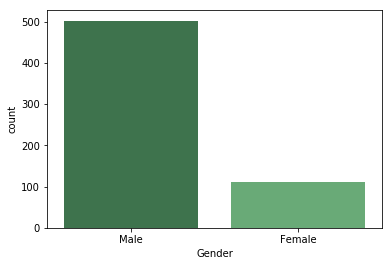

In [11]:
sns.countplot(x="Gender", data=data, palette="Greens_d")

Findings--> it can be seen from the plot that male applicants for loan  are more than females

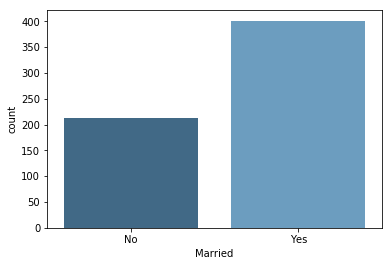

In [12]:
sns.countplot(x="Married", data=data, palette="Blues_d")

Findings--> it can be seen from the plot that Married applicants for loan are more than unmarried

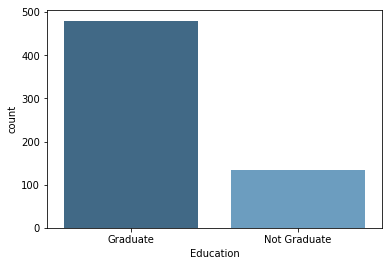

In [13]:
sns.countplot(x="Education", data=data, palette="Blues_d")

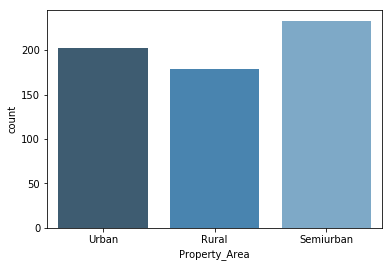

In [14]:
sns.countplot(x="Property_Area", data=data, palette="Blues_d")

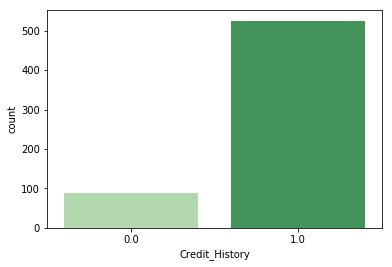

In [15]:
sns.countplot(x="Credit_History", data=data, palette="Greens")

From the above plots it can be concluded that Male , married , graduate , applicants with good creadit history and people living in semiurban areas are taking more loans than others

# Encoding the non numeric Values to numeric using LabelEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
list1=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for val in list1:
    data[val]=Le.fit_transform(data[val].astype(str))

In [17]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [18]:
data.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

There are 422 applicants for whom loan is approved and 192 for whom loan status is not approved

In [19]:
#dropping the loan id column
data1=data.drop(['Loan_ID'],axis=1)

In [20]:
data1.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [21]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


# 2.BoxPlot
The Box plot will help us to identify the outliers in the dataset, if our dataset has significant outliers then those will treated with the help of several techniques.

Lets Check for the outliers!

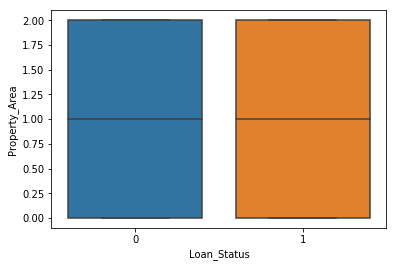

In [22]:
sns.boxplot(x='Loan_Status',y='Property_Area',data=data1)

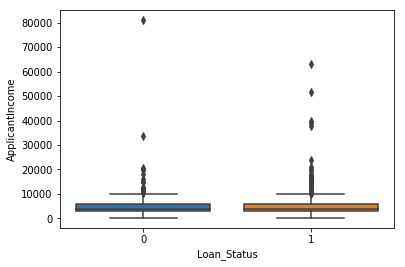

In [23]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=data1)

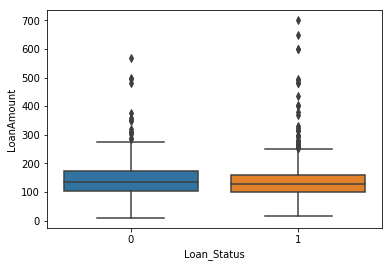

In [24]:
sns.boxplot(x='Loan_Status',y='LoanAmount',data=data1)

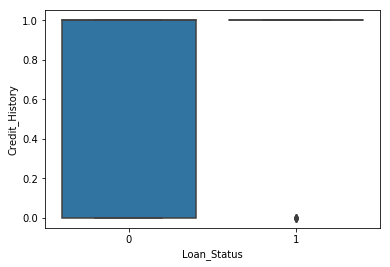

In [25]:
sns.boxplot(x='Loan_Status',y='Credit_History',data=data1)

There are some features like applicant income , loan amount which have outliers.This outliers will be handled
in the handling outliers section below

# 3.Distribution plot.
This plot will display the distribution of the features and will let us know skewness of the dependent variables

<Figure size 360x144 with 0 Axes>

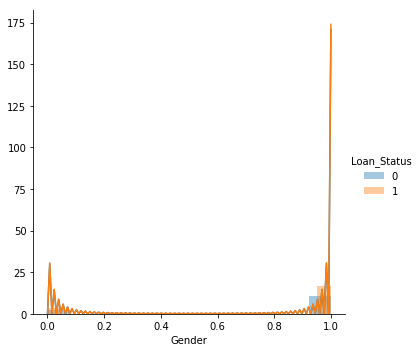

<Figure size 360x144 with 0 Axes>

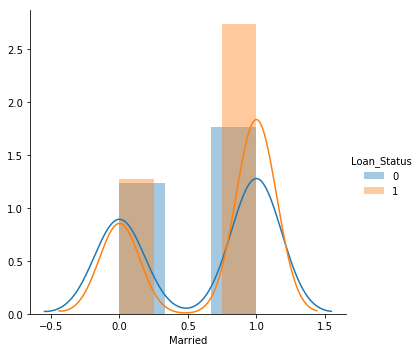

<Figure size 360x144 with 0 Axes>

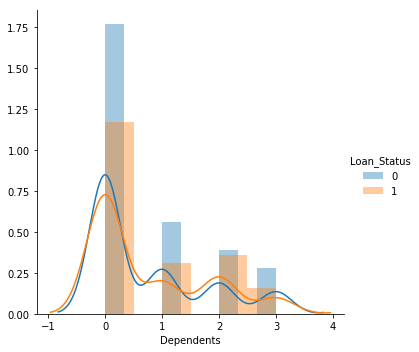

<Figure size 360x144 with 0 Axes>

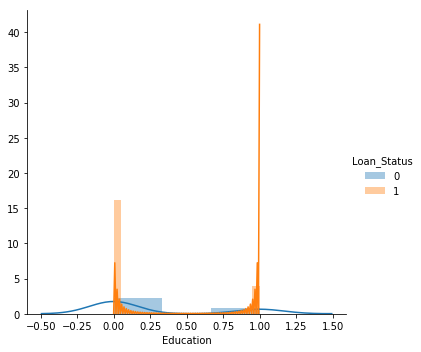

<Figure size 360x144 with 0 Axes>

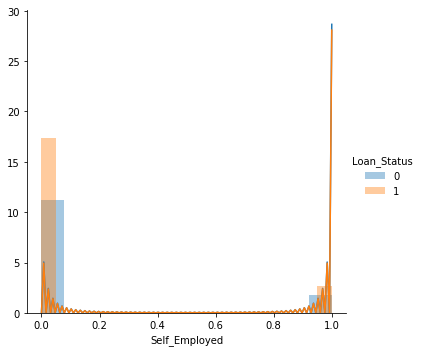

<Figure size 360x144 with 0 Axes>

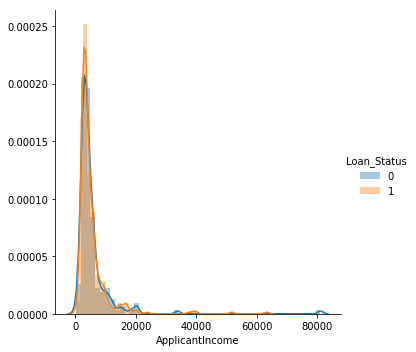

<Figure size 360x144 with 0 Axes>

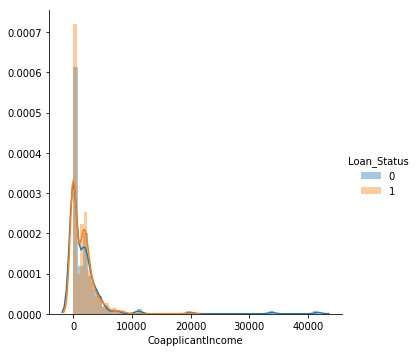

<Figure size 360x144 with 0 Axes>

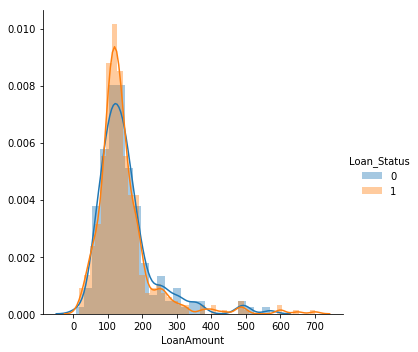

<Figure size 360x144 with 0 Axes>

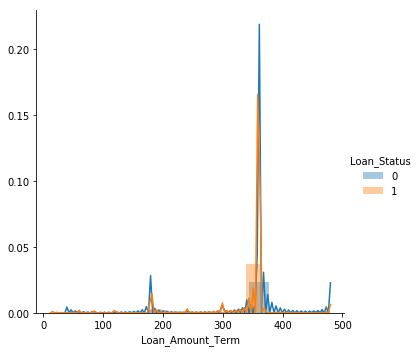

<Figure size 360x144 with 0 Axes>

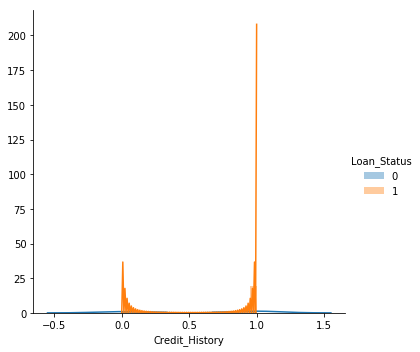

<Figure size 360x144 with 0 Axes>

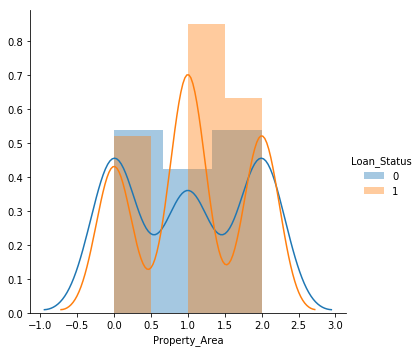

In [26]:
import warnings
warnings.filterwarnings("ignore")
columns=data1.columns[:-1]
for val in columns:
    plt.figure(figsize=(5,2))
    sns.FacetGrid(data1,hue="Loan_Status",size=5)\
    .map(sns.distplot,val)\
    .add_legend();
plt.show();

From the above curves it can be seen that some features are skewed, the removal of the skewness is important part so to have normalised distribution for the fetaures. The skewness will be treated below

# 4.LinePlot

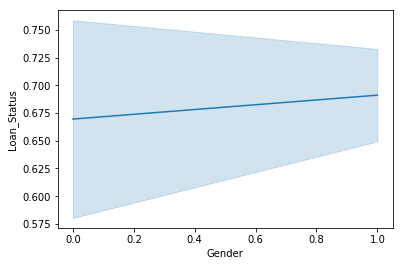

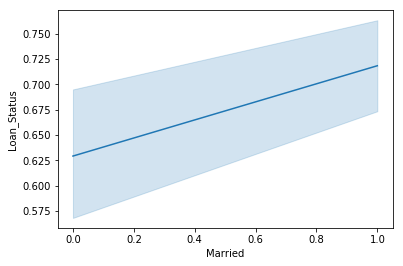

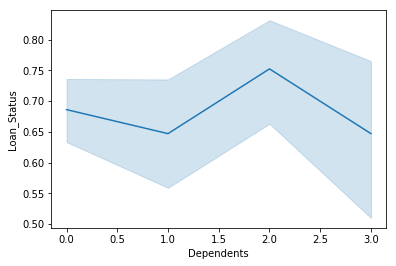

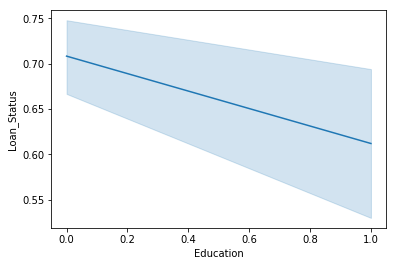

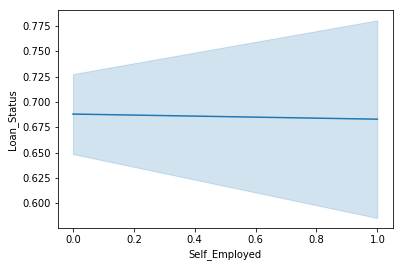

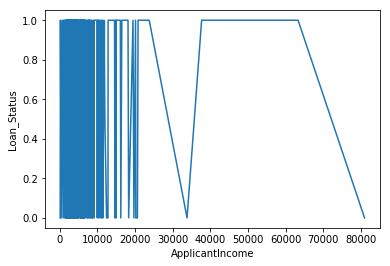

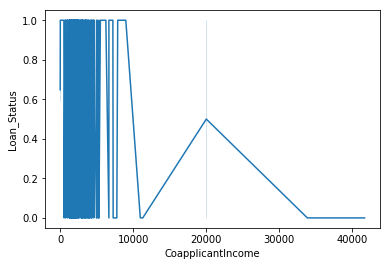

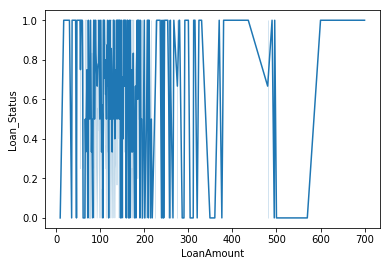

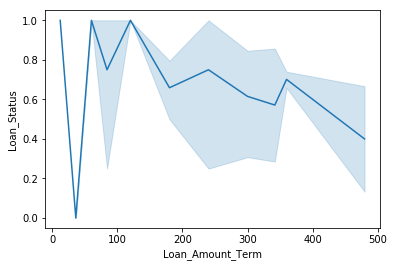

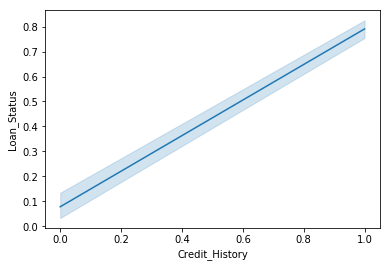

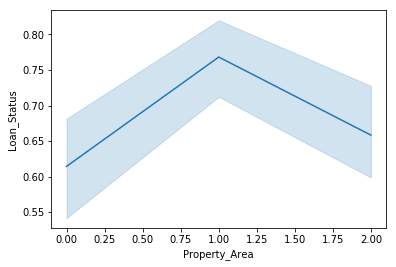

In [27]:
column=list(data1.columns[:-1])
for val in column:
    sns.lineplot(x=val,y='Loan_Status', data=data1)
    plt.show()
    

# 5.Pairplot

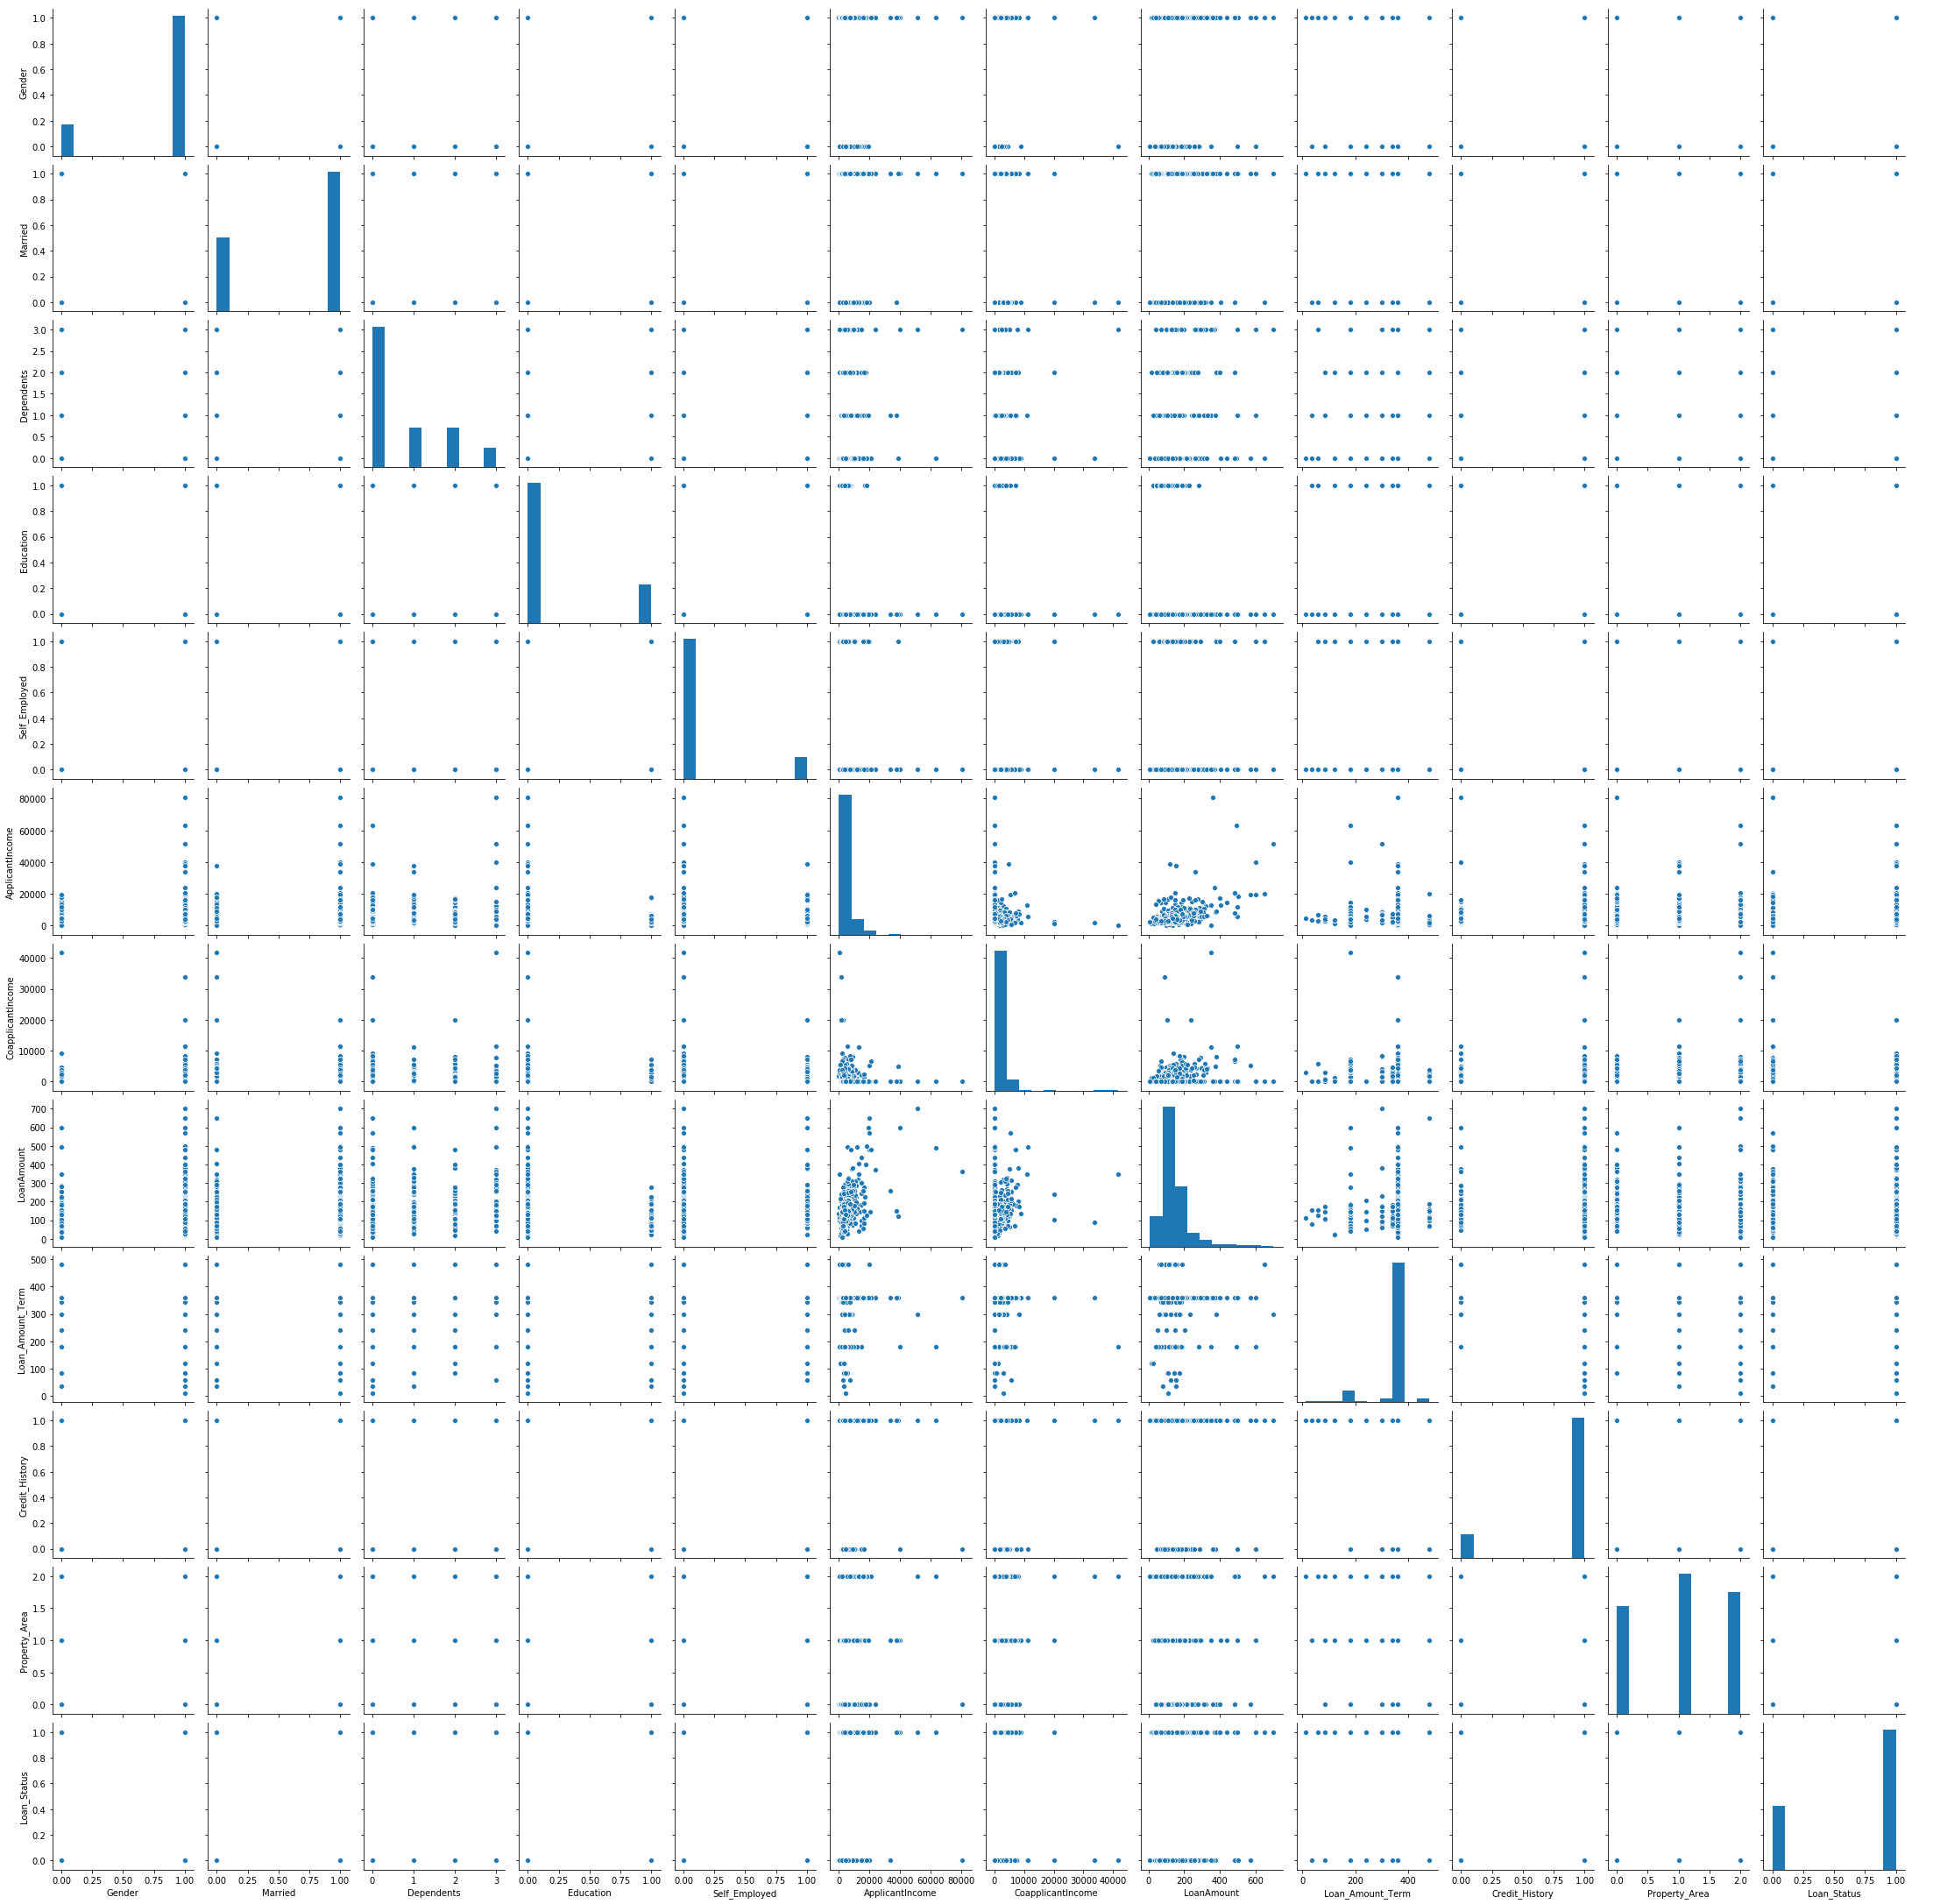

In [28]:
sns.pairplot(data1)

# CorRelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

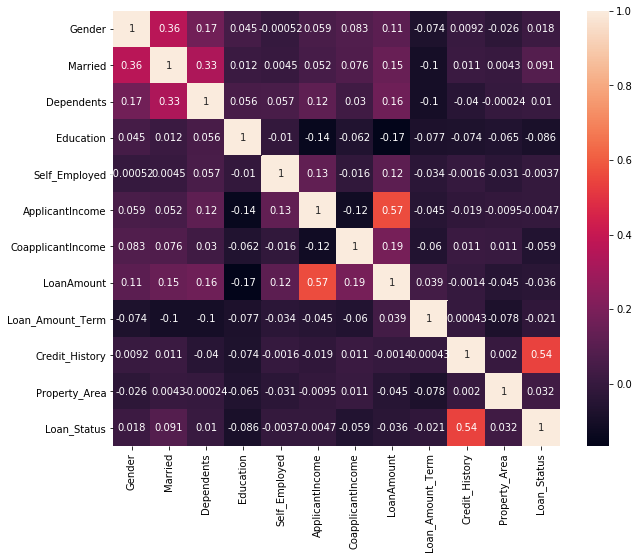

In [29]:
df_cor=data1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_cor,annot=True)

# Feature selection based on correlation matrix
From the below code I have removed the features which are having correlation of more than 0.8. This results in stable parameter estimates of classification which makes it easy to assess the effect of independent variables on dependent variables

In [30]:
columns = np.full((df_cor.shape[0]),True,dtype=bool)
for i in range(df_cor.shape[0]):
    for j in range(i+1, df_cor.shape[0]):
        if df_cor.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data1.columns[columns]
data1 = data1[selected_columns]

In [31]:
data1.shape

(614, 12)

By looking into the shape after performing feature selection using CorRelation ,we found the the features are not very very high corRelated , that's why the shape is not changed for the new data

In [32]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Handling Outliers

In [33]:
from scipy.stats import zscore
zs=np.abs(zscore(data1))
zs

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [34]:
df=data1[(zs<3).all(axis=1)]
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (614, 13)
shape of the data without  outliers   (577, 12)


In this section we have treated the outliers with the help of ZSCORE using threshold value as 3 ,The features which are having the zscore value > 3 are treated as outliers and have been removed.

Hence the new shape of the dataset after outliers removal is 577* 12 . Now this will be our finalised Dataset for modelling.

# Skewness 

In [35]:
data1.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [36]:
for col in data1.columns:
    if data1.skew().loc[col]>0.55:
        data1[col]=np.log1p(data1[col])

Here in this section skewness is analysed and as skewness which can also be seen from the distribution plots in some features is treated in this section using log transformation . We will also be using scaling technique to remove the skewness in this project.

In [37]:
data1.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.671985
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Standard Scaling the data for normalisation

In [38]:
y=data1['Loan_Status']
x=data1.drop(['Loan_Status'],axis=1)


In [39]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)


In [40]:
x_df=pd.DataFrame(x)

In [41]:
df_final = pd.concat([x_df, y], axis=1, sort=False)

In [44]:
df_final.columns=[i for i in data1.columns]

In [46]:
df_final.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.792390,-0.528362,-0.392601,0.516186,-1.107783,0.249219,0.279851,0.411733,1.223298,1
1,0.472343,0.728816,0.543926,-0.528362,-0.392601,0.137806,0.782158,-0.022525,0.279851,0.411733,-1.318513,0
2,0.472343,0.728816,-0.792390,-0.528362,2.547117,-0.519479,-1.107783,-1.356846,0.279851,0.411733,1.223298,1
3,0.472343,0.728816,-0.792390,1.892641,-0.392601,-0.751605,0.897526,-0.152922,0.279851,0.411733,1.223298,1
4,0.472343,-1.372089,-0.792390,-0.528362,-0.392601,0.555727,-1.107783,0.173033,0.279851,0.411733,1.223298,1


In [48]:
y=df_final.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [49]:
x=df_final.iloc[:,:-1]

# Applying Various Classification Models
In this section we will be applying several classification models and hence we will be checking following performance matrix :

1) Accuracy score

2) AUC Score

3) Mean of crossing validation score using accuracy as scoring

4) Std Deviation of crossing validation score using accuracy as scoring

5) Confusion Matrix

We have also used GridSearch for tuning the parameters

Importing all the required library

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Function for Accuracy Score
This function is built to find the best accuracy score depending on the random state while splitting the model. This function prints the best accuracy score and returns the random state for that accuracy score

In [51]:
def accur_at_rstate(model,x,y):
    random_state=np.arange(42,101)
    accuracy=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        #DT=DecisionTreeClassifier()
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if accuracy_score(test_y,pred) > accuracy:
            accuracy=accuracy_score(test_y,pred)
            Final_r_state=r_state
        #Calculating 
    print('The maximum accuracy reached is {} at random state {}' .format(accuracy,Final_r_state))
    return Final_r_state
    

# Function for Auc Score and Confusion Matrix
This function will result in auc score for model and also print the confusion matrix

In [52]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
def roc_curve(model,r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
    fpr_tr,tpr_tr,threshold = metrics.roc_curve(train_y,model.predict_proba(train_x)[:,1])
    fpr_test,tpr_test,threshold = metrics.roc_curve(test_y,model.predict_proba(test_x)[:,1])
    plt.plot(fpr_tr,tpr_tr ,label="train AUC ="+str(metrics.auc(fpr_tr,tpr_tr)))
    plt.plot(fpr_test,tpr_test ,label="test AUC ="+str(metrics.auc(fpr_test,tpr_test)))
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()
    pred=model.predict(test_x)
    sns.heatmap(confusion_matrix(test_y,pred),annot=True)

# Function for highest_accuracy
This function finds the highest_accuracy of the model

In [53]:
def highest_accuracy(model,x,y,Final_r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=Final_r_state)
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    return accuracy_score(test_y,pred)

Below function is created to make a list of highest_accuracy generated by different classifier , so that it can be compared at last, for the selection of the best model

In [54]:
accuracy=[]
def list_accuracy(x):
    accuracy.append(x)
    return accuracy

# 1.DecisionTreeClassifier

In [55]:
from sklearn.model_selection import GridSearchCV
#max_depth = np.arange(30)
depth={'max_depth':range(0,30)}
DT=DecisionTreeClassifier()
gs=GridSearchCV(DT,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 1}

The maximum accuracy reached is 0.8594594594594595 at random state 63
Cross_val_score  0.809462881514061


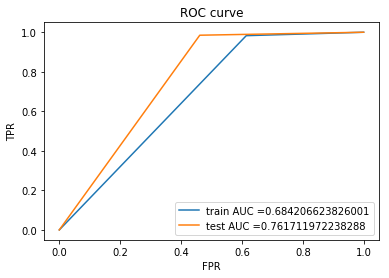

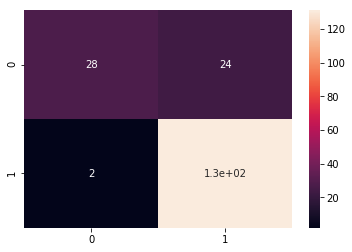

In [57]:
DT=DecisionTreeClassifier(max_depth=1)
Final_Random_state=accur_at_rstate(DT,x,y)
from sklearn.model_selection import cross_val_score
print('Cross_val_score ',cross_val_score(DT,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(DT,Final_Random_state)

In [58]:
Max_accuracy=highest_accuracy(DT,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 2.KNeighborsClassifier

In [59]:
from sklearn.model_selection import GridSearchCV
neighbour={'n_neighbors':range(1,50),'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Knn=KNeighborsClassifier()
gs=GridSearchCV(Knn,neighbour,cv=10)
gs.fit(x,y)
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 24}

The maximum accuracy reached is 0.8702702702702703 at random state 63
Cross_val_score  0.8045715047314406


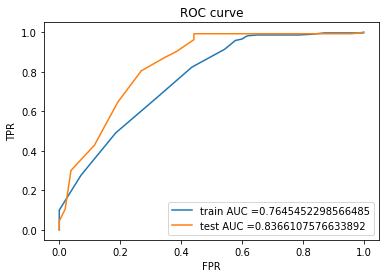

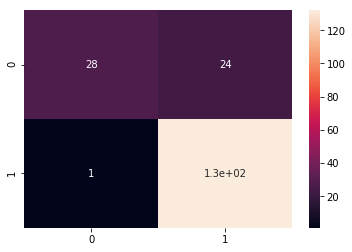

In [60]:
from sklearn.model_selection import cross_val_score
Knn=KNeighborsClassifier(n_neighbors=24,algorithm='auto')
Final_Random_state=accur_at_rstate(Knn,x,y)
print('Cross_val_score ',cross_val_score(Knn,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(Knn,Final_Random_state)

In [61]:
Max_accuracy=highest_accuracy(Knn,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 3.Naive Bayes

In [62]:
from sklearn.naive_bayes import BernoulliNB
alpha={'alpha':range(1,30)}
NB=BernoulliNB()
gs=GridSearchCV(NB,alpha,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 1}

The maximum accuracy reached is 0.8540540540540541 at random state 63
Cross_val_score  0.809462881514061


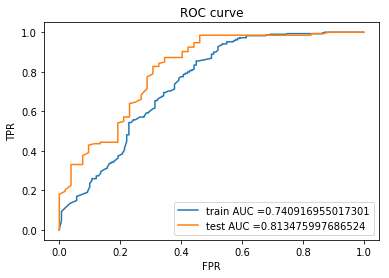

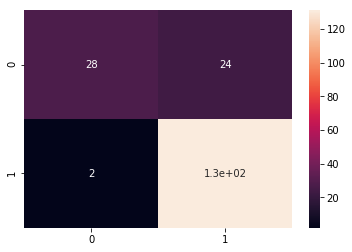

In [63]:
NB=BernoulliNB(alpha=1)
Final_Random_state=accur_at_rstate(NB,x,y)
print('Cross_val_score ',cross_val_score(NB,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(NB,Final_Random_state)

In [64]:
Max_accuracy=highest_accuracy(NB,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 4.Support Vector Classifier

In [73]:
gamma={'gamma':range(1,30),'kernel':['Poly','rbf']}
svc=SVC()
gs=GridSearchCV(svc,gamma,cv=10)
gs.fit(x,y)
gs.best_params_

{'gamma': 1, 'kernel': 'rbf'}

In [74]:
svc=SVC(gamma=1,kernel='rbf')
Final_Random_state=accur_at_rstate(svc,x,y)
print('Cross_val_score ',cross_val_score(svc,x,y,cv=5 ,scoring='accuracy').mean())

The maximum accuracy reached is 0.772972972972973 at random state 44
Cross_val_score  0.723137411701986


In [75]:
Max_accuracy=highest_accuracy(svc,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 5.Logistic Regression

In [65]:
C={'C':range(1,30),'penalty':['l1', 'l2', 'elasticnet']}
log=LogisticRegression()
gs=GridSearchCV(log,C,cv=10)
gs.fit(x,y)
gs.best_params_

{'C': 1, 'penalty': 'l2'}

The maximum accuracy reached is 0.8486486486486486 at random state 52
Cross_val_score  0.809462881514061


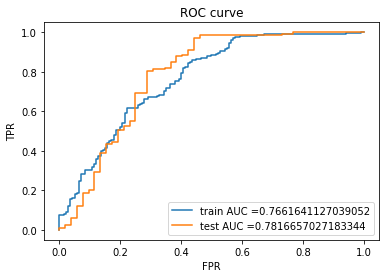

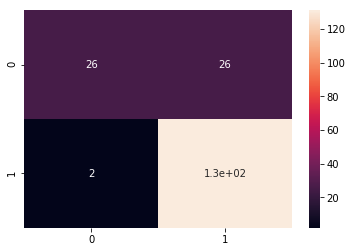

In [66]:
log=LogisticRegression(C=1,penalty='l2')
Final_Random_state=accur_at_rstate(log,x,y)
print('Cross_val_score ',cross_val_score(log,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(log,Final_Random_state)

In [67]:
Max_accuracy=highest_accuracy(log,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# Appying ensemble model for better results

# 1.RandomForestClassifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':range(1,50),'max_depth':range(1,30),}
RF=RandomForestClassifier()
gs=GridSearchCV(RF,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 7, 'n_estimators': 32}

The maximum accuracy reached is 0.8540540540540541 at random state 63
Cross_val_score  0.8029454884712781


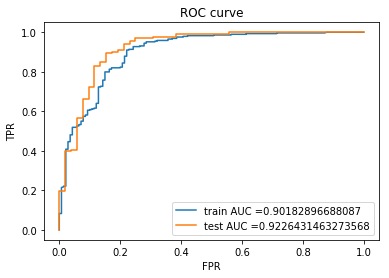

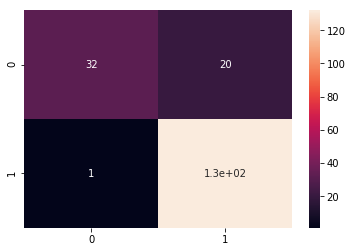

In [69]:
RF=RandomForestClassifier(n_estimators=32,max_depth=7)
Final_Random_state=accur_at_rstate(RF,x,y)
print('Cross_val_score ',cross_val_score(RF,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(RF,Final_Random_state)

In [70]:
Max_accuracy=highest_accuracy(RF,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 2.BaggingClassifier

In [71]:
from sklearn.ensemble import BaggingClassifier
parameters={'n_estimators':range(1,30),'base_estimator':[log,NB,Knn,DT]}
BG=BaggingClassifier()
gs=GridSearchCV(BG,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False), 'n_estimators': 4}

The maximum accuracy reached is 0.8486486486486486 at random state 51
Cross_val_score  0.8078235372517659


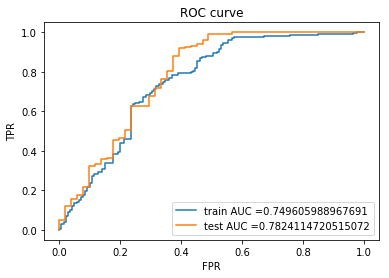

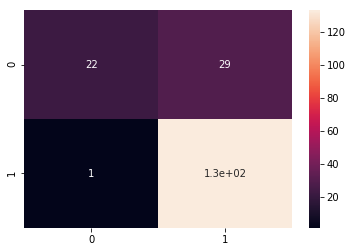

In [72]:
BG=BaggingClassifier(n_estimators=4,base_estimator=log)
Final_Random_state=accur_at_rstate(BG,x,y)
print('Cross_val_score ',cross_val_score(BG,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(BG,Final_Random_state)

In [76]:
Max_accuracy=highest_accuracy(BG,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# Plotting Bargraph to Analyse the Performance Matrix

In [77]:
model =['DT','KNN','NB','LOG','RF','SVC','BAGGING']

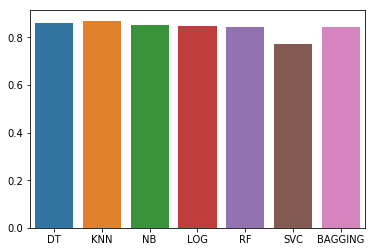

In [80]:
sns.barplot(x=model,y=List_acc)

from the above barplot --> KNeighborsClassifier has highest accuracy

After performing several classification models on this data set and after analysing the performance matrix for all the models , it is concluded that KNeighborsClassifier is giving the best results which are as follows :

The maximum accuracy reached is 0.8702702702702703 at random state 63

Cross_val_score  0.8045715047314406

Therefore KNeighborsClassifier is selected as our final model

# Final Model  ----> KNeighborsClassifier

Accuracy 0.8702702702702703
--------------------------------------


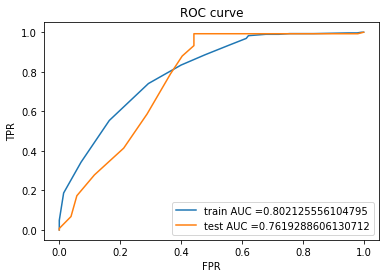

-----------------Confusion Matrix---------------------


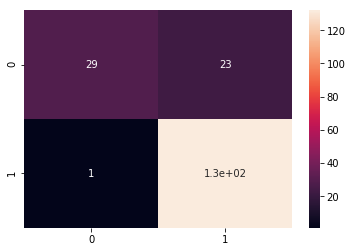

In [81]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=63)
Knn=KNeighborsClassifier(n_neighbors=24,algorithm='auto')
Knn.fit(train_x,train_y)
pred = Knn.predict(test_x)
print('Accuracy',accuracy_score(test_y,pred))
print('--------------------------------------')
roc_curve(Knn,63)
print('-----------------Confusion Matrix---------------------')


In [82]:
print('classification Report \n',classification_report(test_y,pred))

classification Report 
               precision    recall  f1-score   support

           0       0.97      0.56      0.71        52
           1       0.85      0.99      0.92       133

    accuracy                           0.87       185
   macro avg       0.91      0.78      0.81       185
weighted avg       0.88      0.87      0.86       185



In [104]:
print('mean cross_val_score',cross_val_score(Knn,x,y,cv=5,scoring='accuracy').mean())
print('std deviation of cross_val_score',cross_val_score(Knn,x,y,cv=5,scoring='accuracy').std())

mean cross_val_score 0.8045715047314406
std deviation of cross_val_score 0.017682276050654203


In [99]:
df_output=pd.DataFrame()
df_output['Loan_Status_Actual']=test_y
df_output['Loan_Status_predicted']=pred
df_output


,Loan_Status_Actual,Loan_Status_predicted
38,1,1
61,1,1
264,1,1
559,1,1
452,0,0
...,...,...
255,1,1
160,1,1
117,1,1
393,1,1


In [100]:
df_output.shape

(185, 2)

# Saving the predcited vs actual loan status values

In [103]:
df_output[['Loan_Status_Actual','Loan_Status_predicted']].to_csv('loan_status_output.csv',index=False)

In [105]:
from sklearn.externals import joblib
joblib.dump(Knn,"Knn_loanstatus.pkl")

['Knn_loanstatus.pkl']

# Conclusion :-
In this project we have found that this is dataset is classification driven dataset as output class is binary ,that is either loan is approved or not approved.This data is about the approval of the  depending on various feature like Applicants income education , loan amount , credit history etc.
These all feature collectively combine to decide whether the loan should be approved or not.

With the help of this data set I have tried to predict the loan status using ML algorithM


In this project we have performed Null value analysis ,Univariate analysis ,Bivariate analysis amd several EDA techniques.

I have also scaled the data in order to remove the skewness and at last I have performed several clasiification algorithm and based on the accuracy we have finalised KNeighborsClassifier as the best model for this dataset and I also checked the cross validate score for this model in order to analyse underfit/Overfit of the data.

At last I have saved the model